<a href="https://colab.research.google.com/github/edburdett/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



## 1) Write a function





## Found a helpful image [here](https://www.probabilisticworld.com/frequentist-bayesian-approaches-inferential-statistics/)

![https://www.probabilisticworld.com/wp-content/uploads/2016/06/bayes-theorem-with-description-2.png](https://www.probabilisticworld.com/wp-content/uploads/2016/06/bayes-theorem-with-description-2.png)

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):
  posterior_probability = prob_drunk_prior
  count = 0
  while posterior_probability < 0.95:
    complement = 1 - posterior_probability # Complement of the prior belief
    true_pos = 1 # True positive rate (100%)
    numerator = true_pos * posterior_probability
    marginal = (true_pos * posterior_probability) + (false_positive_rate * complement)
    posterior_probability = numerator / marginal
    count = count + 1
    prob_drunk_given_positive(posterior_probability, false_positive_rate)
  return posterior_probability, count
  print(posterior_probability, count)

In [2]:
prob_drunk_given_positive(1/1000, .08)

(0.9606895076105054, 4)

## 2) Explore scipy.stats.bayes_mvs

In [0]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [0]:
# Import data with column names and coding '?' as NaNs

column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', na_values='?', names=column_headers, header=None)
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
# Recode 'y' as 1 and 'n' as 0
df = df.replace({'y':1, 'n':0})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# Split df by party
rep = df[df['party']=='republican']
print(rep.head())
dem = df[df['party']=='democrat']
dem.head()

         party  handicapped-infants  ...  duty-free  south-africa
0   republican                  0.0  ...        0.0           1.0
1   republican                  0.0  ...        0.0           NaN
7   republican                  0.0  ...        NaN           1.0
8   republican                  0.0  ...        0.0           1.0
10  republican                  0.0  ...        0.0           0.0

[5 rows x 17 columns]


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:
# Define a function to remove NaNs from a column

def no_nans(col):
  col = col[~np.isnan(col)]
  return col

In [0]:
# Define function to calculate confidence interval on specified data with default confidence of 0.95
def confidence_interval(data, confidence=0.95):
  data = np.array(data) # Convert column to np.array
  mean = np.mean(data) # Calculate mean
  n = len(data) # Calculate n (sample size)
  stderr = np.std(data, ddof=1) / np.sqrt(n) # Calculate standard error
  moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1) # Calculate margin of error (look up t-stat)
  return (mean, mean-moe, mean+moe)

In [0]:
# Remove NaNs from water-project column
water_project_no_nans = no_nans(df['water-project'])

In [0]:
CI = confidence_interval(water_project_no_nans)
CI

(0.5038759689922481, 0.45384081311663604, 0.5539111248678601)

In [0]:
mean, var, std = stats.bayes_mvs(water_project_no_nans)
mean

Mean(statistic=0.5038759689922481, minmax=(0.4619161006559928, 0.5458358373285033))

(0.45, 0.56)

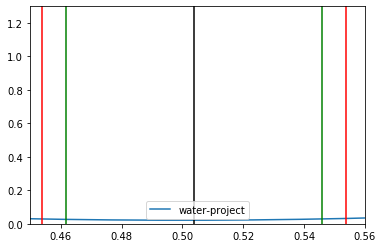

In [0]:
# Use seaborn to generate kde plot
sns.kdeplot(water_project_no_nans)

# Use matplotlib to plot mean and confidence interval
plt.axvline(CI[0], color='black') # Plot mean
plt.axvline(CI[1], color='red') # Plot bounds of confidence interval
plt.axvline(CI[2], color='red')
plt.axvline(mean[1][0], color='green') # Plot bounds of Bayesian interval
plt.axvline(mean[1][1], color='green')
plt.xlim(.45, .56) # 

## The difference between Bayesian and Frequentist statistics

Bayesian statistics makes us of prior probabilities. Frequentist statistics does not.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!